# Try This Exercise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In this exercise, please create two rather pathological data sets and test the MLP on them.

For the first one, use `sklearn.datasets.make_moons` as:

     dataset1=make_moons(n_samples=200,noise=0.3)
     
For the second one, use 

     dataset2=make_circles(n_samples=200,noise=0.2, factor=0.5, random_state=1)
     
These commands basically take a square of randomly-placed data and overlay a moon or circle shape on them, with noise. 
     
For each of them, run the `MLPClassifier` as above.  Then, for each: 
- Determine the score.  
- Since these will be 2D datasets, use the `meshgrid` as above to show the decision boundary.

### Answer:

I've done this process below, pretty much according to the lecture. The classifier seems to work fairly well at predicting the test set.

In [2]:
# init data
n_samples = 200
X1, y1 = make_moons(n_samples=n_samples, noise=0.3)
X2, y2 = make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1)

# scale data
scale1 = StandardScaler()
scale2 = StandardScaler()
X1 = scale1.fit_transform(X1)
X2 = scale2.fit_transform(X2)

# setup training and testing for each dataset
test_size = 0.4
rng_state = 42
X1_train, X1_test, y1_train, y1_test = \
    train_test_split(X1, y1, test_size=test_size, random_state=rng_state)
X2_train, X2_test, y2_train, y2_test = \
    train_test_split(X2, y2, test_size=test_size, random_state=rng_state)

In [3]:
# setup and train classifier
clf1 = MLPClassifier()
clf2 = MLPClassifier()

clf1.fit(X1_train, y1_train)
clf2.fit(X2_train, y2_train)

# get scores
score1 = clf1.score(X1_test, y1_test)
score2 = clf2.score(X2_test, y2_test)

print(f'Moons score: {score1}')
print(f'Circles score: {score2}')

c:\users\masamune\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\masamune\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Moons score: 0.775
Circles score: 0.8875


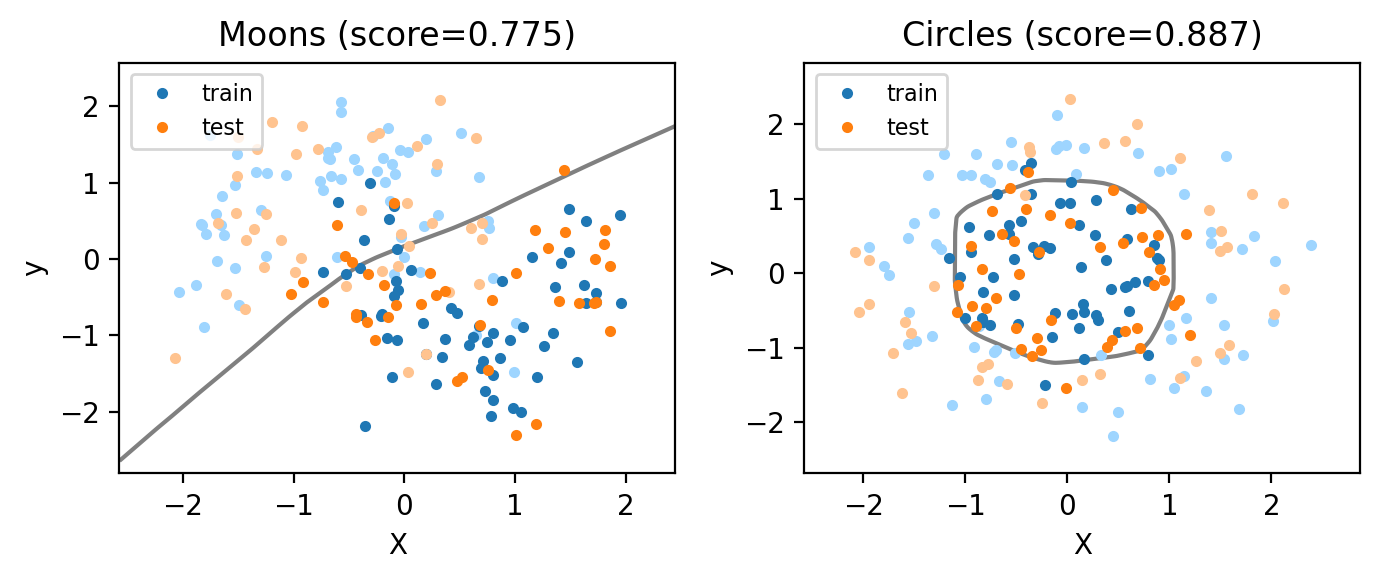

In [4]:
# display decision boundary
def draw_boundary(axis, X, clf):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z_mlp = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z_mlp=Z_mlp.reshape(xx.shape)

    axis.contour(xx, yy, Z_mlp,[0.5], colors='grey')

def plot_points(axis, X_train, X_test, y_train, y_test):
    ms = 3
    axis.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1],
              'o', c='#9ed5ff', ms=ms)
    axis.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
              'o', c='tab:blue', ms=ms, label='train')
    axis.plot(X_test[y_test == 0, 0], X_test[y_test == 0, 1],
              'o', c='#ffc38f', ms=ms)
    axis.plot(X_test[y_test == 1, 0], X_test[y_test == 1, 1],
              'o', c='tab:orange', ms=ms, label='test')

fig, ax = plt.subplots(1, 2, dpi=200, figsize=(7, 3))

plot_points(ax[0], X1_train, X1_test, y1_train, y1_test)
draw_boundary(ax[0], X1, clf1)

plot_points(ax[1], X2_train, X2_test, y2_train, y2_test)
draw_boundary(ax[1], X2, clf2)

ax[0].set_title(f'Moons (score={score1:.3f})')
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')

ax[1].set_title(f'Circles (score={score2:.3f})')
ax[1].set_xlabel('X')
ax[1].set_ylabel('y')

ax[0].legend(loc='upper left', fontsize=8)
ax[1].legend(loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()